# Descriptive ~~Statistic~~ Analysis

Goal: to ask better question, to form a hypothesis

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from statsmodels import robust

matplotlib.style.use("ggplot")

### Describe

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Data Types

In [4]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Numeric Only

In [5]:
df.select_dtypes(include=np.number).head(2)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3


In [6]:
df.describe()
# df.describe(percentiles=[.05, .1, .25, .5, .75, .9, .95]) #, include = 'all')

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Mean (Average) Absolute Deviation
<b> AAD in R, mad in pandas </b>

$$ \frac{1}{N} \sum_{1}^{N} | X_i - mean(X) | $$

In [8]:
df.select_dtypes(include=np.number).mad()

total_bill    6.869440
tip           1.033019
size          0.779898
dtype: float64

Do It Yourself:

In [9]:
for col in df.select_dtypes(include=np.number).columns:
    aad = df[col].apply(lambda x: abs(x - df[col].mean())).mean()
    print(col,' ' * (20 - len(col)), '{:0.6f}'.format(aad))

total_bill            6.869440
tip                   1.033019
size                  0.779898


### Median Absolute Deviation
<b> MAD in R, mad in statsmodels </b>

$$ median( | X_i - median(X) | ) $$

In [10]:
df.select_dtypes(include=np.number).apply(
    lambda x: robust.scale.mad(x.dropna(), c=1), axis=0
)

total_bill    5.03
tip           0.90
size          0.00
dtype: float64

Do It Yourself:

In [11]:
for col in df.select_dtypes(include=np.number).columns:
    mad = df[col].apply(lambda x: abs(x - df[col].median())).median()
    print(col,' ' * (20 - len(col)), '{:0.6f}'.format(mad))

total_bill            5.030000
tip                   0.900000
size                  0.000000


### Kurtosis

In [12]:
df.select_dtypes(include=np.number).kurtosis()

total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64

### Skewness

In [13]:
df.select_dtypes(include=np.number).skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

for more detail about what pandas can do
https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html


### Group By and do stuff

In [14]:
df.groupby("time")["tip"].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [15]:
df.groupby("time")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


In [16]:
def rangestat(x):
    return x.max() - x.min()

In [17]:
df.groupby("time").agg(
    {
        'tip': ['mean', 'median'],
        'total_bill': [rangestat, 'mean']
    }
)

tip        total_bill           
            mean median  rangestat       mean
time                                         
Lunch   2.728088   2.25      35.60  17.168676
Dinner  3.102670   3.00      47.74  20.797159

In [18]:
# df.corr()
df.corr().style.background_gradient(cmap='Blues')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# Statistical Theory

source: [learnstatisticwithr](https://learningstatisticswithr.com/lsr-0.6.pdf)

## Intro to Probability

#### <b>About Probability</b>

 Probability theory is “the doctrine of chances”.  It’s a branch of mathematics that tells you how often different kinds of events will happen.  For example, all of these questions are things you can answer using probability theory:
 
* What are the chances of a fair coin coming up heads 10 times in a row?
 
* If I roll two six sided dice, how likely is it that I’ll roll two sixes?
 
* How likely is it that five cards drawn from a perfectly shuffled deck will all be hearts?
 
* What are the chances that I’ll got Hu Tao in the next Gacha roll?


probabilistic questions start with a <b> known model of the world </b>, and we use that model to do some calculations.  The underlying model can be quite simple.For instance, in the coin flipping example, we can write down the model like this:

$$ p(Head) = 0.5 $$

<b> in probability theory, the model is known, but the data are not.</b>


#### <b>About Statistic</b>

In Statistics we <b> do not know the truth about the world </b>. All we have is the data, and from the data we want to <b> learn the truth about the world </b>. Stat questions tend to look more like this:


* If my friend flips a coin 10 times and gets 10 heads, are they playing a trick on me?

* If the lottery commissioner's spouse wins the lottery, how likely is it that the lottery was rigged?

* If 5 cards off the top of the deck are all hearts, how likely that the deck was shuffled?


This time around, the only thing we have are data. What I know is that I saw my friend flip the coin 10 times and it came up heads every time.  And what I want to <b>infer</b> is whether or not I should conclude that what I just saw was actually a fair coin being flipped 10 times in a row, or whether I should suspect that my friend is playing a trick on me.

The data I have look like this:

H H H H H H H H H H

and what I'm trying to do is work out which <b> model of the world </b> I should put my trust in? if the coin is fair, then the model I should adopt is $P(Head) = 0.5$

if the coin is not fair, then I should conclude that the probability of heads is not 0.5 which we would write as $P(Head) \not= 0.5$

### What is Probability?

Suppose I want to bet on a soccer game between two teams of robots,Arduino  Arsenal andC  Milan.  After thinking about it, I decide that there is an 80% probability that Arduino Arsenal winning.  What do I mean by that?  Here are three possibilities...


* They’re  robot  teams,  so  I  can  make  them  play  over  and  over  again,  and  if  I  did  that,Arduino Arsenal would win 8 out of every 10 games on average.

* For any given game, I would only agree that betting on this game is only “fair” if a 1 bet on C Milan gives a 5 payoff (i.e.  I get my 1 back plus a 4 reward for being correct), as would a  4 bet on Arduino Arsenal(i.e., my 4 bet plus a 1 reward).

* My subjective “belief” or “confidence” in anArduino Arsenalvictory is four times as strong as mybelief in a C Milan victory



#### Frequentist View

* Probability as a <b> logn-run frequency </b> in a nutshell:  flip a fair coin over and over again, and as N grows large (approaches infinity,denoted $N \rightarrow \infty$), the proportion of heads will converge to 50%.


#### Bayesian View

* Probability of an event as the <b>degree of belief or centainty</b> that an intelligent and rational agent assigns to that truth of that event.

In [19]:
#![image.png](attachment:8d9ee929-f265-4a94-94e5-a09d99cd5a5a.png)

### Basic Probability Theory

##### Discrete Random Variable

##### Probability of a Union of 2 events (or)

$$ p(A \lor B) = p(A) + p(B) - p(A \land B)$$

##### Joint Probability of 2 events (and)

$$ p(A \land B) = p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

##### Conditional Probability

$$ p(A|B)= \frac{p(A,B)}{p(B)}$$

### Distribution

in this session we only talks about 4 classic Distribution, namely Binomial, Normal, t Distribution and chi-squared Distribution

#### Binomial Distribution

Binomial distribution is a probability distribution that summarises the likelihood that a variable will take one of two independent values under a given set of parameters. The distribution is obtained by performing a number of Bernoulli trials.

A Bernoulli trial is assumed to meet each of these criteria :

* There must be only 2 possible outcomes.

* Each outcome has a fixed probability of occurring. A success has the probability of $\theta$, and a failure has the probability of $1 – \theta$.

* Each trial is completely independent of all others.


For example, I have 20 dice with image of skull on it, what is the probability of getting exactly 4 skull if I roll all the 20 dice?

written mathematically:

$$ P(X | \theta, N)  = \frac{N!}{X!(N - X)!} \theta^X(1-\theta)^{N-X}$$

for our case $X = 4$, $ N = 20$, $\theta = \frac{1}{6} $


![dice.png](http://blankdice.co.uk/images/products/skulldice_black_spot.jpg)

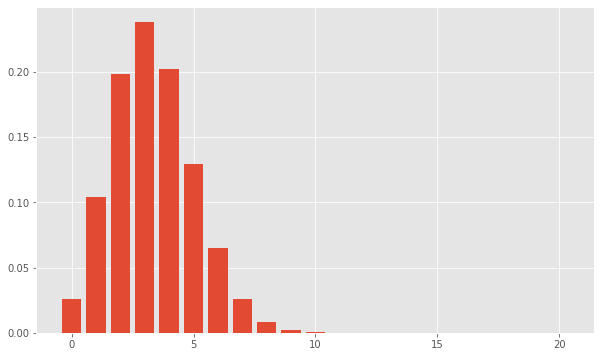

In [20]:
from scipy.stats import binom

n = 20
p = 1/6
r_values = list(range(n + 1)) 

plt.figure(figsize=(10,6))
dist = [binom.pmf(r, n, p) for r in r_values] 
plt.bar(r_values, dist)
plt.show()

In [21]:
binom.pmf(k=4, n=20, p=(1/6))

0.20220358121717216

what about the probability of getting 4 skull or fewer?

In [22]:
binom.cdf(k=4, n=20, p=(1/6))

0.768749218992842

In [23]:
# 0, 1, 2, 3, 4 skull
sum([binom.pmf(k=i, n=20, p=(1/6)) for i in range(5)])

0.768749218992841

It is known that 40% of user have use our subscription. If 100 user are randomly selected, what is the probability that only between 30 and 60 of them paid for subscription?

In [24]:
binom.cdf(k=60, n=100, p=0.4) - binom.cdf(k=30, n=100, p=0.4)

0.9751991354210762

It is known that 60% of user have use our subscription. If 100 user are randomly selected, what is the probability that only more than 60 of them paid for subscription?

In [25]:
1 - binom.cdf(k=60, n=100, p=0.6)

0.462075340885964

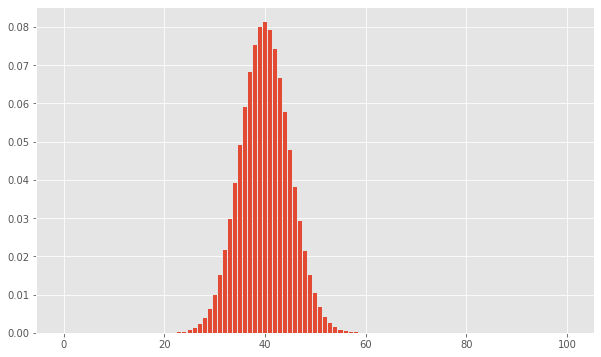

In [26]:
n = 100
p = 0.4
r_values = list(range(n + 1)) 
plt.figure(figsize=(10,6))
dist = [binom.pmf(r, n, p) for r in r_values] 
plt.bar(r_values, dist)
plt.show()

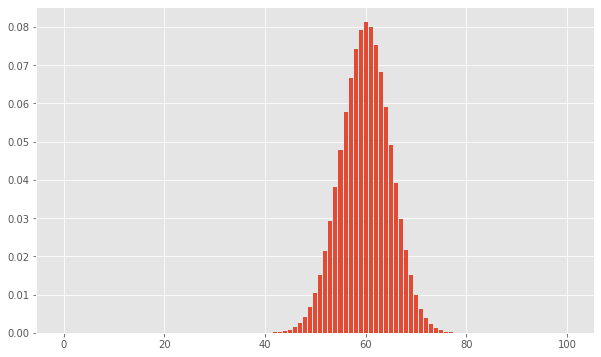

In [27]:
n = 100
p = 0.6
r_values = list(range(n + 1)) 
plt.figure(figsize=(10,6))
dist = [binom.pmf(r, n, p) for r in r_values] 
plt.bar(r_values, dist)
plt.show()

#### Normal Distribution
$$ X \sim \mathcal{N}(\mu,\,\sigma^{2})$$

$$ \mathcal{N}(\mu,\,\sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma}}  exp \left( - \frac{(X - \mu)^2}{2\sigma^2} \right) $$

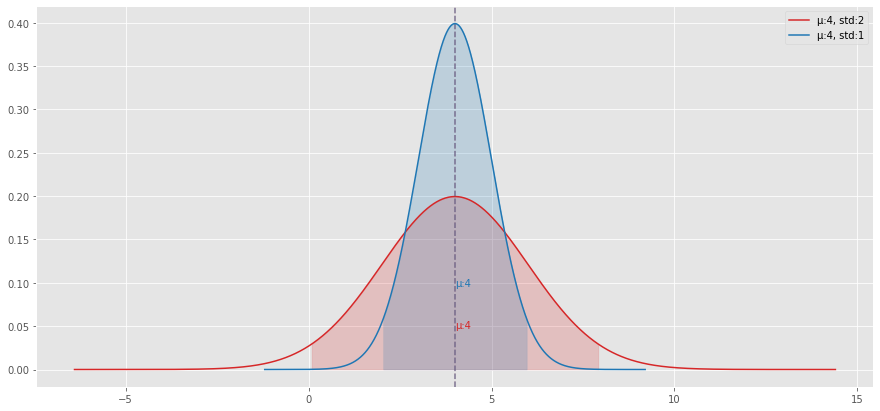

In [28]:
from scipy import stats

def plot_normal(fig, ax, mu, sd, color, confidence_interval=0.95):

    na = stats.norm(mu, sd)
    left, right = na.interval(confidence_interval)
    x = np.linspace(na.ppf(1e-7), na.ppf(1-1e-7), 10000)
    y = na.pdf(x)
    ax.plot(x, y, color=f"tab:{color}", label=f"μ:{mu}, std:{sd}")
    ax.axvline(x=mu, color=f"tab:{color}", alpha=0.5, linestyle="--")
    ax.text(mu, np.mean(y), f"μ:{mu}", color=f"tab:{color}")
    ax.fill_between(x, 0, na.pdf(x), color=f"tab:{color}", alpha=0.2, where=((x > left) & (x < right)))

fig, ax = plt.subplots(figsize=(15,7))
plot_normal(fig, ax, 4, 2, 'red')
plot_normal(fig, ax, 4, 1, 'blue')
plt.legend()
plt.show()


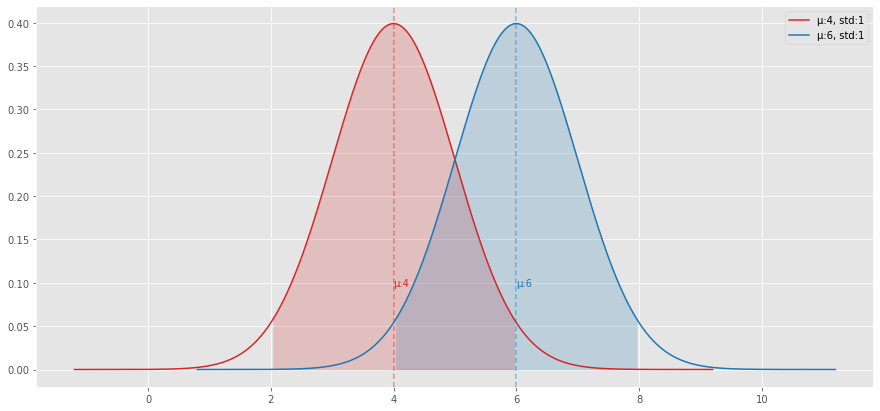

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
plot_normal(fig, ax, 4, 1, 'red')
plot_normal(fig, ax, 6, 1, 'blue')
plt.legend()
plt.show()


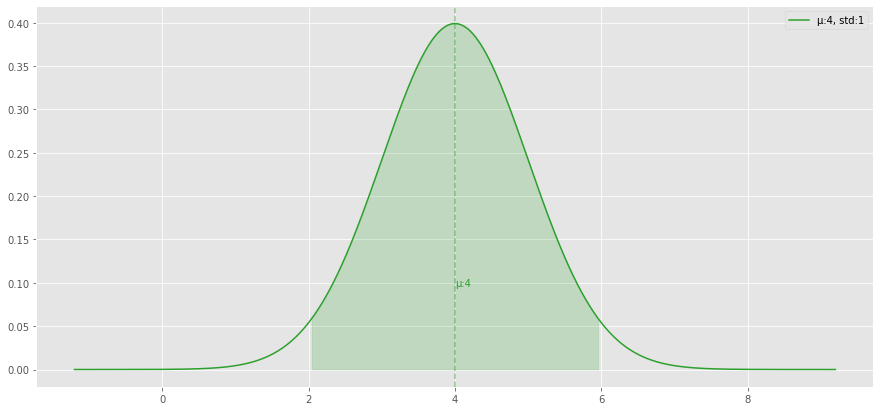

In [30]:
fig, ax = plt.subplots(figsize=(15,7))
plot_normal(fig, ax, 4, 1, 'green')
plt.legend()
plt.show()


# Inferential Statistic

the role of descriptive statistics is to concisely summarise what we do know.  In contrast,  the purpose of inferential statistics is to “learn what we do not know from what we do”.  Now that we have a foundation in probability theory, we are in a good position to think  about  the  problem  of  statistical  inference.

What  kinds  of  things  would  we  like  to  learn  about?

And how do we learn them?

### Sample, Population, Sampling

#### What is Population?

Suppose I run an experiment using 100 undergrad Fasilkomers as my participants.  My goal, as a cognitive scientist, is to try to learn something about <b> how the mind works </b>.  So, which of the following would count as “the population”:

* all of undergrad Fasilkom student?

* undergrad CS student in general, anywhere in the world?

* Indonesian currently living?

* Indonesian of similar ages to my sample?

* Every single person currently living?

* any human being, past, present, or future?

* any intelligent being? Alien? Cthulhu?


Each of these defines a real group of mind-possessing entities, all of which might be of interest to me asa cognitive scientist, and it’s not at all clear which one ought to be the true population of interest.

### Lets play around for a bit, Estimate Population Mean

In [31]:
np.random.seed(2021)

In [32]:
mu_population = 100
std_population = 50
population = np.random.normal(mu_population, std_population, 10000)

In [33]:
sample_10 = pd.Series(population).sample(10, random_state=2021)
sample_100 = pd.Series(population).sample(100, random_state=2021)
sample_5000 = pd.Series(population).sample(5000, random_state=2021)

In [34]:
sample_10.mean(), sample_10.std()

(101.73846546254363, 43.66337363645522)

In [35]:
sample_100.mean(), sample_100.std()

(101.02996984286105, 50.7107877850216)

In [36]:
sample_5000.mean(), sample_5000.std()

(99.79763071370017, 50.1439582822995)

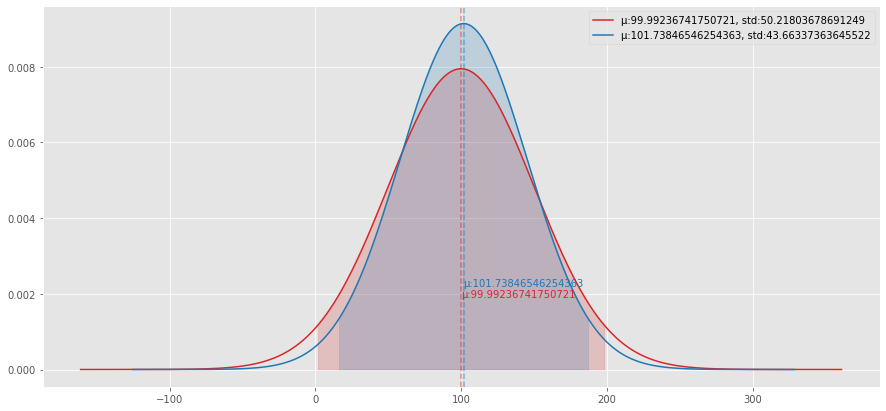

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
plot_normal(fig, ax, population.mean(), population.std(), 'red')
plot_normal(fig, ax, sample_10.mean(), sample_10.std(), 'blue')
plt.legend()
plt.show()

In [38]:
sample_5 = pd.Series(population).sample(5).values

In [39]:
sample_5.mean()

129.03332685060974

In [40]:
n_sample = 10
n_experiment = 10000
experiments = [pd.Series(population).sample(n_sample).values for _ in range(n_experiment)]

In [41]:
experiment_df_10 = pd.DataFrame(experiments, index=[f'experiment_{i+1}' for i in range(n_experiment)])

In [42]:
experiment_df_10.mean(axis=1).to_frame().rename({0:'mean'}, axis=1)

,mean
experiment_1,79.552143
experiment_2,63.388417
experiment_3,105.256140
experiment_4,108.257679
experiment_5,95.270213
...,...
experiment_9996,83.509461
experiment_9997,117.428440
experiment_9998,90.975806
experiment_9999,97.023838


##### Sampling distribution of the mean

<AxesSubplot:ylabel='Count'>

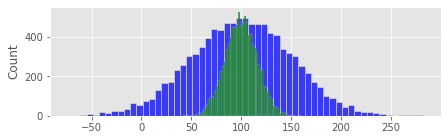

In [43]:
fig, ax = plt.subplots(figsize=(7,2))
sns.histplot(population, ax=ax, color='blue')
sns.histplot(experiment_df_10.mean(axis=1).values, ax=ax, color='green')

In [44]:
n_sample = 2
n_experiment = 10000
experiments = [pd.Series(population).sample(n_sample).values for _ in range(n_experiment)]

<AxesSubplot:ylabel='Count'>

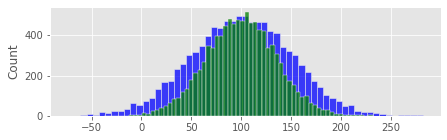

In [45]:
experiment_df_2 = pd.DataFrame(experiments, index=[f'experiment_{i+1}' for i in range(n_experiment)])
fig, ax = plt.subplots(figsize=(7,2))
sns.histplot(population, ax=ax, color='blue')
sns.histplot(experiment_df_2.mean(axis=1).values, ax=ax, color='green')

Standard Error Of The Mean (SEM)

$$ SEM = \frac{\sigma}{\sqrt{N}}$$

In [46]:
SEM_2 = population.std() / np.sqrt(2)
SEM_10 = population.std() / np.sqrt(10)

In [47]:
#confidence interfal 95% -> q = 1 - (100-95)/2
stats.norm.ppf(q=.975)

1.959963984540054

In [48]:
mu_2 = experiment_df_2.iloc[0].mean()
mu_10 = experiment_df_10.iloc[0].mean()

#### Confidence Interval

$$ \bar X - (something * SEM) <= \mu  <= \bar X + (something * SEM)$$

In [49]:
left, right = mu_2 - (stats.norm.ppf(q=.975) * SEM_2), mu_2 + (stats.norm.ppf(q=.975) * SEM_2) 
print('left\t', left)
print('right\t', right)
print('diff\t', right-left)

left	 36.6790670026859
right	 175.87380547131556
diff	 139.19473846862968


In [50]:
left, right = mu_10 - (stats.norm.ppf(q=.975) * SEM_10), mu_10 + (stats.norm.ppf(q=.975) * SEM_10) 
print('left\t', left)
print('right\t', right)
print('diff\t', right-left)

left	 48.42725311737705
right	 110.67703258260921
diff	 62.249779465232166


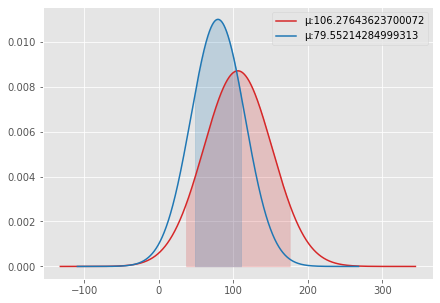

In [51]:
fig, ax = plt.subplots(figsize=(7,5))
def plot_with_sem(fig, ax, data, population_std, color, alpha=0.05):
    mu = data.mean()
    SEM = population.std() / np.sqrt(data.shape[0])
    na = stats.norm(data.mean(), data.std())
    
    q = 1- (alpha / 2)
    left, right = data.mean() - (stats.norm.ppf(q=q) * SEM), data.mean() + (stats.norm.ppf(q=q) * SEM)
    x = np.linspace(na.ppf(1e-7), na.ppf(1-1e-7), 10000)
    y = na.pdf(x)
    ax.plot(x, y, color=f"tab:{color}", label=f"μ:{mu}")
    ax.fill_between(x, 0, na.pdf(x), color=f"tab:{color}", alpha=0.2, where=((x > left) & (x < right)))

plot_with_sem(fig, ax, experiment_df_2.iloc[0].values, population.std(), 'red')
plot_with_sem(fig, ax, experiment_df_10.iloc[0].values, population.std(), 'blue')
# plot_with_sem(fig, ax, pd.Series(population).sample(1000), population.std(), 'green')
plt.legend()
plt.show()

### How to interpret this s8

In [52]:
result = []

alpha = 0.05 # confidence Interval = 0.95

for mu in experiment_df_2.mean(axis=1).values:
    
    q = 1 - alpha / 2
    left = mu - (stats.norm.ppf(q=q) * SEM_2)
    right = mu + (stats.norm.ppf(q=q) * SEM_2) 
    result.append(100 >= left and 100 <= right)
np.mean(result)

0.952

In [53]:
result = []

alpha = 0.05 # confidence Interval = 0.95

for mu in experiment_df_10.mean(axis=1).values:
    
    q = 1 - alpha / 2
    
    left = mu - (stats.norm.ppf(q=q) * SEM_10)
    right = mu + (stats.norm.ppf(q=q) * SEM_10) 
    result.append(100 >= left and 100 <= right)
np.mean(result)

0.949

### tapi boong, di Real Life kita gatau population std

In [54]:
q = 1 - alpha / 2
stats.t.ppf(q=q, df=1)

_sem = stats.sem(experiment_df_2.iloc[0])
left = mu_2 - (stats.t.ppf(q=q, df=1) * _sem)
right = mu_2 + (stats.t.ppf(q=q, df=1) * _sem)
left, right

(-476.1646039679957, 688.7174764419972)

In [55]:
q = 1 - alpha / 2
degree_of_freedom = experiment_df_10.shape[0] - 1
# stats.t.ppf(q=q, df=degree_of_freedom)

_sem = stats.sem(experiment_df_10.iloc[0])
left = mu_10 - (stats.t.ppf(q=q, df=degree_of_freedom) * _sem)
right = mu_10 + (stats.t.ppf(q=q, df=degree_of_freedom) * _sem)
left, right

(55.83865211005254, 103.26563358993371)

In [56]:
result = []

alpha = 0.05 # confidence Interval = 0.95

for dat in experiment_df_2.values:
    mu = dat.mean()
    q = 1 - alpha / 2
    
    _sem = stats.sem(dat)
    left = mu - (stats.t.ppf(q=q, df=dat.shape[0] - 1) * _sem)
    right = mu + (stats.t.ppf(q=q, df=dat.shape[0] - 1) * _sem)
    result.append(100 >= left and 100 <= right)
np.mean(result)

0.9496

In [57]:
result = []

alpha = 0.05 # confidence Interval = 0.95

for dat in experiment_df_10.values:
    mu = dat.mean()
    q = 1 - alpha / 2
    
    _sem = stats.sem(dat)
    left = mu - (stats.t.ppf(q=q, df=dat.shape[0] - 1) * _sem)
    right = mu + (stats.t.ppf(q=q, df=dat.shape[0] - 1) * _sem)
    result.append(100 >= left and 100 <= right)
np.mean(result)

0.9506